In [220]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

In [221]:
dataset = pd.read_csv(r"C:\Users\dimri\Downloads\census_income.csv")

In [222]:
dataset.head(4)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [223]:
dataset.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [224]:
dataset.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# No Null Value Present

In [225]:
dataset.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data cleaning and Analysis

In [226]:
dataset.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [227]:
features = ["Workclass" ,'Education','Marital_Status','Occupation','Relationship','Race','Sex','Native_country']

In [228]:
dataset.nunique().to_frame("No of Unqiue values") 


,No of Unqiue values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [229]:
dataset['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

##we can replace incomes as >50000 as 1 and <50000 as 0

In [230]:
dataset['Workclass'].value_counts()

Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

# replace ? with another data

In [231]:
dataset['Workclass'] = dataset['Workclass'].replace(' ?', np.nan)


In [232]:
dataset['Workclass'].value_counts()

Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [233]:
print(dataset['Workclass'].unique())


[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [234]:
dataset.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

In [235]:
dataset.dropna(inplace=True)

In [236]:
dataset.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [237]:
dataset['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [238]:
dataset['Education'].value_counts()

Education
HS-grad         9969
Some-college    6777
Bachelors       5181
Masters         1675
Assoc-voc       1321
11th            1057
Assoc-acdm      1020
10th             833
7th-8th          574
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: count, dtype: int64

In [239]:
dataset['Marital_status'].value_counts()

Marital_status
Married-civ-spouse       14340
Never-married             9916
Divorced                  4259
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: count, dtype: int64

In [240]:
dataset['Occupation'].value_counts()


Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
?                       7
Name: count, dtype: int64

In [241]:
dataset['Occupation'] = dataset['Occupation'].replace(" ?" , np.nan)

In [242]:
dataset.dropna(inplace=True)

In [243]:
dataset['Relationship'].value_counts()

Relationship
Husband           12704
Not-in-family      7864
Own-child          4525
Unmarried          3271
Wife               1435
Other-relative      918
Name: count, dtype: int64

In [244]:
dataset['Race'].value_counts()

Race
White                 26300
Black                  2909
Asian-Pac-Islander      974
Amer-Indian-Eskimo      286
Other                   248
Name: count, dtype: int64

In [245]:
dataset['Sex'].value_counts()

Sex
Male      20787
Female     9930
Name: count, dtype: int64

In [246]:
dataset['Native_country'].value_counts()

Native_country
United-States                 27503
Mexico                          610
?                               556
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece       

In [247]:
dataset['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [248]:
dataset['Native_country'] = dataset['Native_country'].replace(' ?' , np.nan)

In [249]:
dataset['Native_country'].isnull().sum()

556

In [250]:
dataset.dropna(inplace=True)

In [251]:
dataset.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [252]:
dataset['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Data Encoding

In [253]:
dataset['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [254]:
grouped = dataset.groupby('Income')

for name , group in grouped:
    print(name)
    print(group)

 <=50K
       Age          Workclass  Fnlwgt      Education  Education_num  \
0       50   Self-emp-not-inc   83311      Bachelors             13   
1       38            Private  215646        HS-grad              9   
2       53            Private  234721           11th              7   
3       28            Private  338409      Bachelors             13   
4       37            Private  284582        Masters             14   
...    ...                ...     ...            ...            ...   
32552   32            Private  116138        Masters             14   
32554   22            Private  310152   Some-college             10   
32555   27            Private  257302     Assoc-acdm             12   
32557   58            Private  151910        HS-grad              9   
32558   22            Private  201490        HS-grad              9   

            Marital_status          Occupation    Relationship  \
0       Married-civ-spouse     Exec-managerial         Husband   
1       

In [255]:
col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [256]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [257]:
!pip install scikit-learn




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [258]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()


In [259]:
dataset['Workclass']= lab_enc.fit_transform(dataset['Workclass'])
dataset['Education']= lab_enc.fit_transform(dataset['Education'])
dataset['Occupation']=lab_enc.fit_transform(dataset['Occupation'])
dataset['Marital_status']=lab_enc.fit_transform(dataset['Marital_status'])
dataset['Relationship']=lab_enc.fit_transform(dataset['Education'])
dataset['Race']=lab_enc.fit_transform(dataset['Race'])
dataset['Sex']=lab_enc.fit_transform(dataset['Sex'])
dataset['Native_country']=lab_enc.fit_transform(dataset['Native_country'])
dataset['Income']=lab_enc.fit_transform(dataset['Income'])


In [260]:
dataset.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,9,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,11,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,1,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,9,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,12,4,0,0,0,40,38,0


## Exploratory data analysis (EDA)

In [261]:
import warnings
warnings.filterwarnings('ignore')

## Univariate analysis

In [262]:
dataset.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [263]:
!pip install matplotlib



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [264]:
!pip install seaborn




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


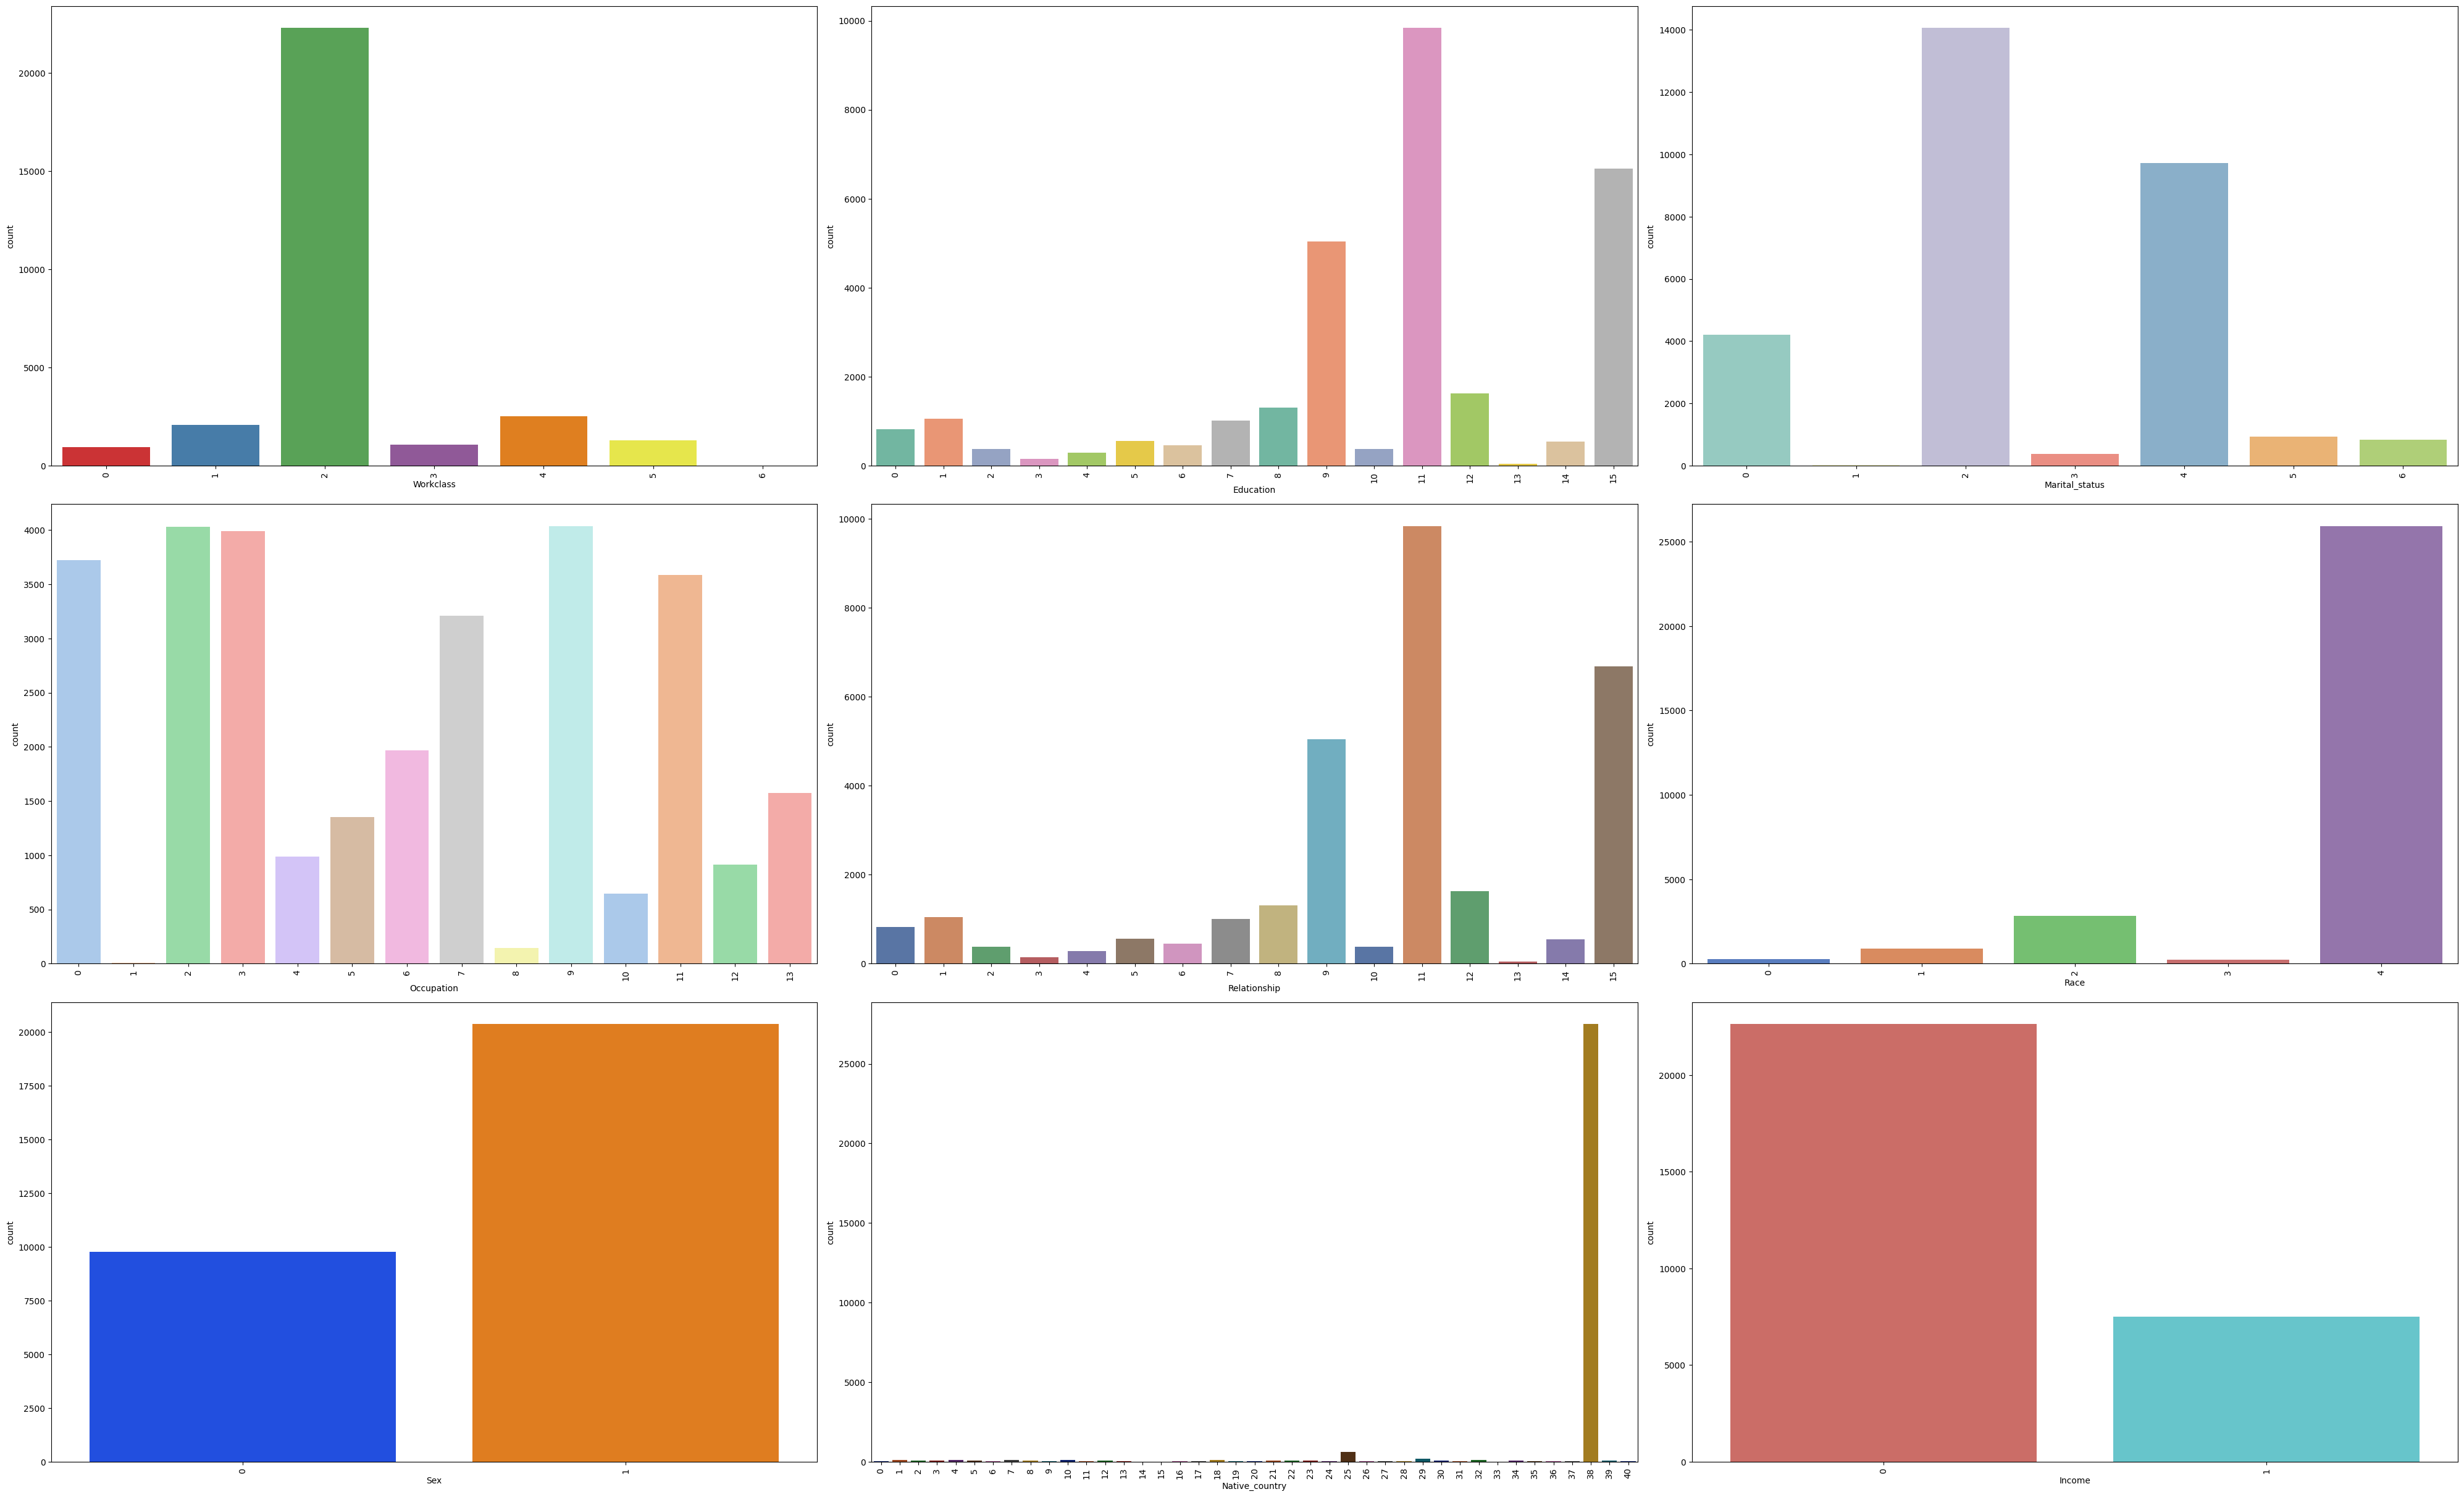

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
count_col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
palettes = ['Set1', 'Set2', 'Set3', 'pastel', 'deep', 'muted', 'bright', 'dark', 'hls']
plt.figure(figsize=(40,40))
for i in range(len(count_col)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=dataset,x=count_col[i], palette=palettes[i])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [266]:
dataset.shape

(30161, 15)

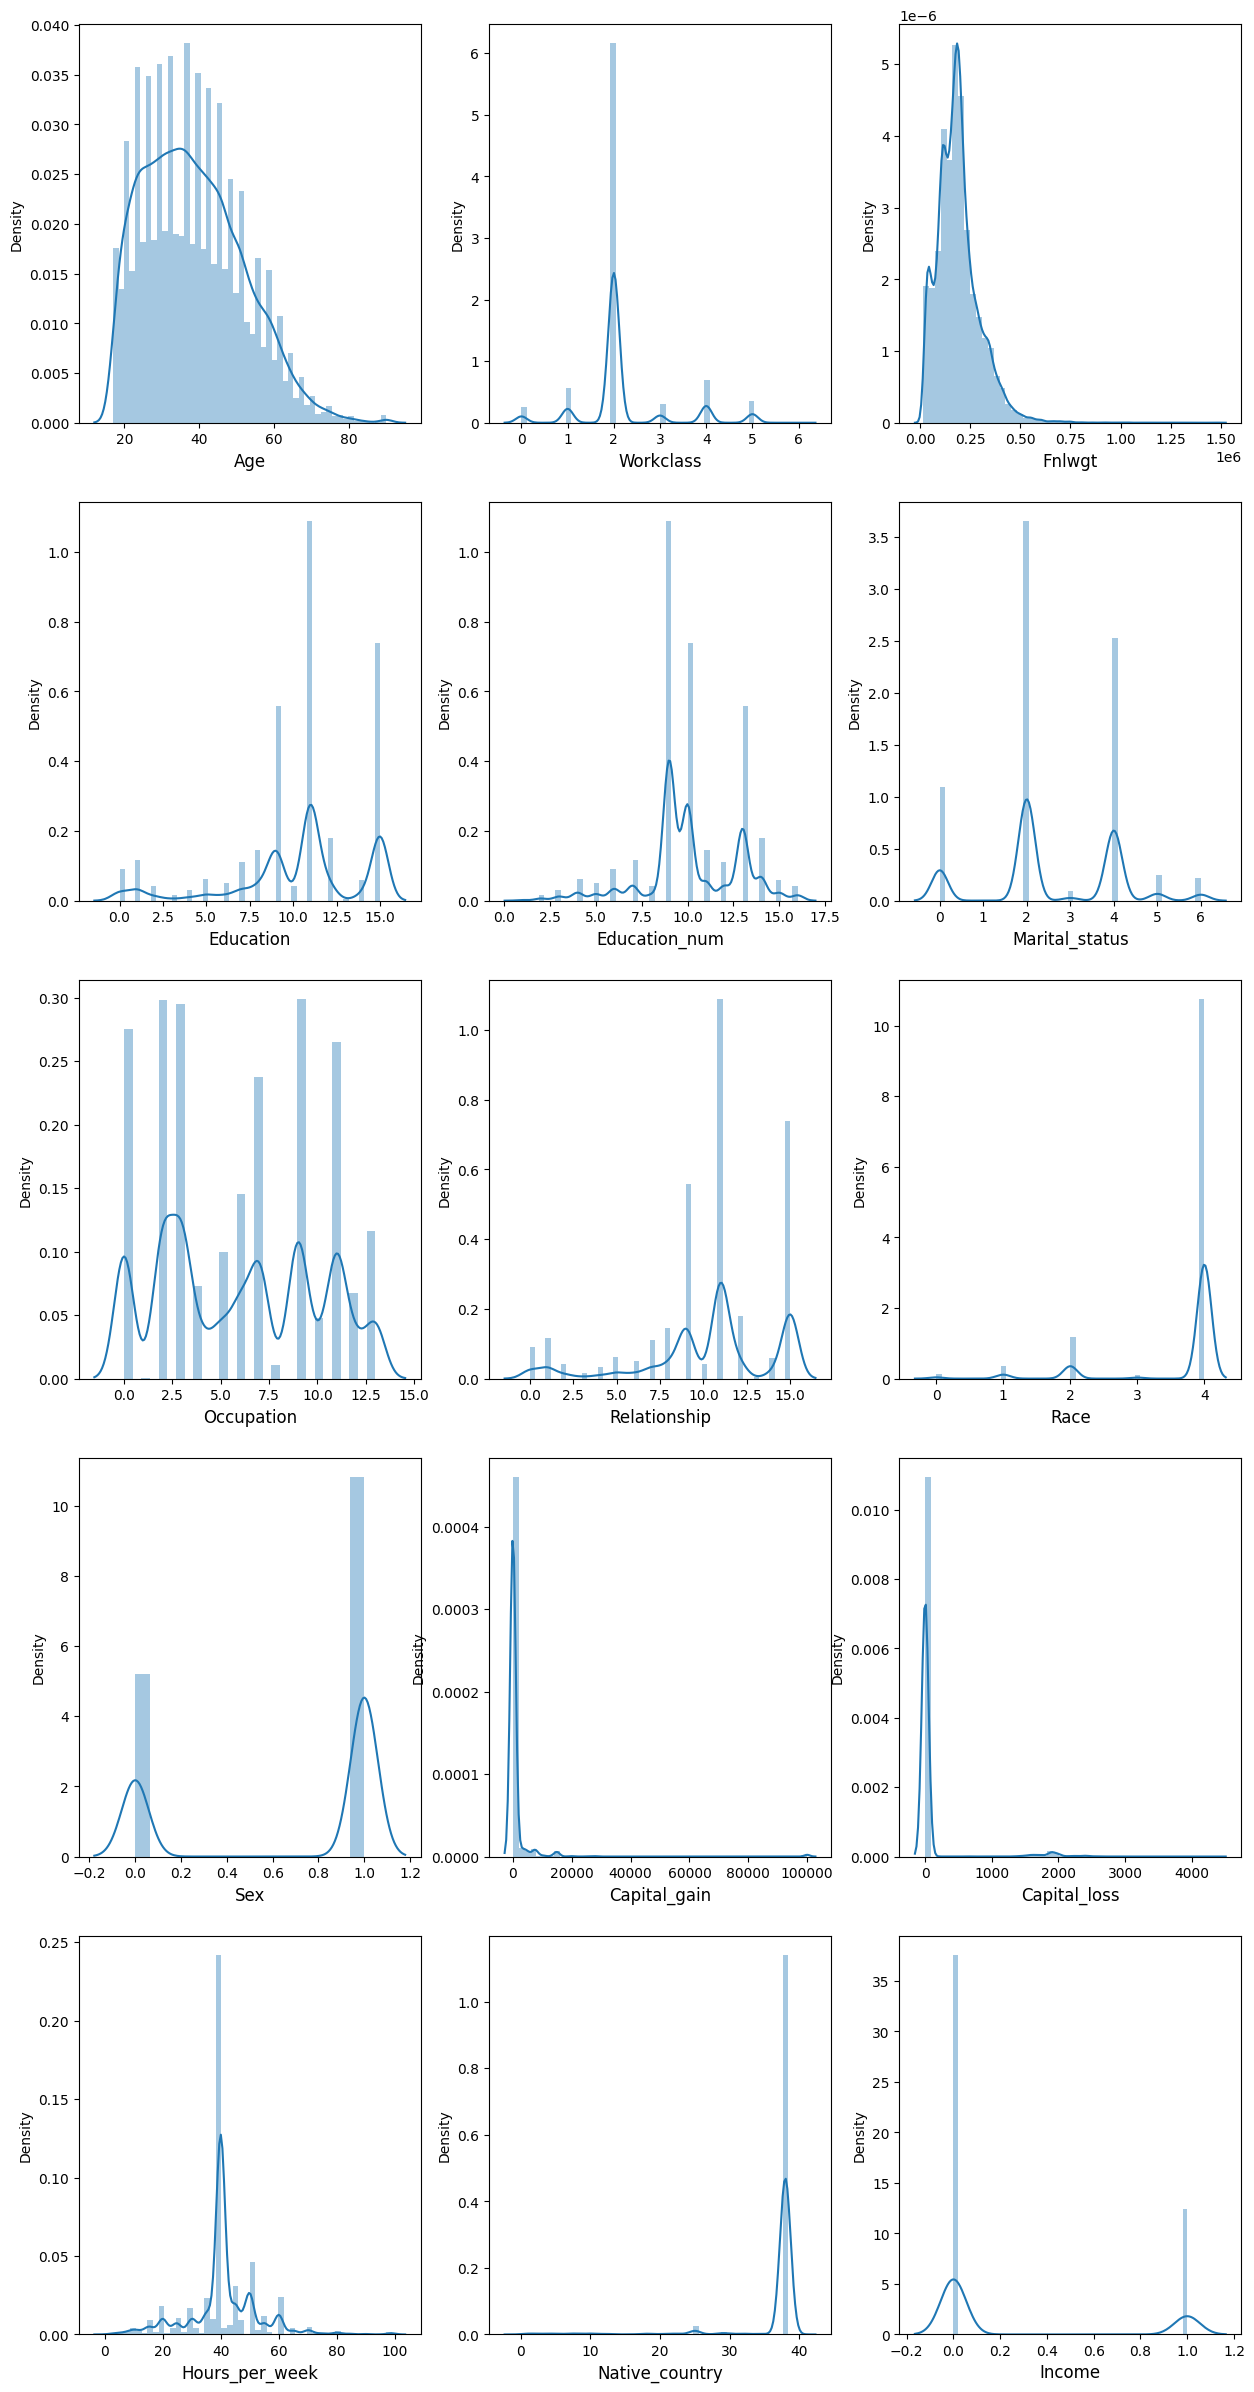

In [267]:
plt.figure(figsize=(15,30))
plotnumber = 1
for column in dataset:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

## Age and Fnlwgt are features with continous nature and are right skewed we need to remove skewness

In [268]:
abs(dataset.corr()['Income']).sort_values(ascending=True)

Fnlwgt            0.008978
Workclass         0.018103
Native_country    0.023273
Occupation        0.051551
Race              0.071666
Education         0.078981
Relationship      0.078981
Capital_loss      0.150050
Marital_status    0.193504
Sex               0.216715
Capital_gain      0.221200
Hours_per_week    0.229480
Age               0.242000
Education_num     0.335317
Income            1.000000
Name: Income, dtype: float64

<Axes: title={'center': 'Correlation with Income'}>

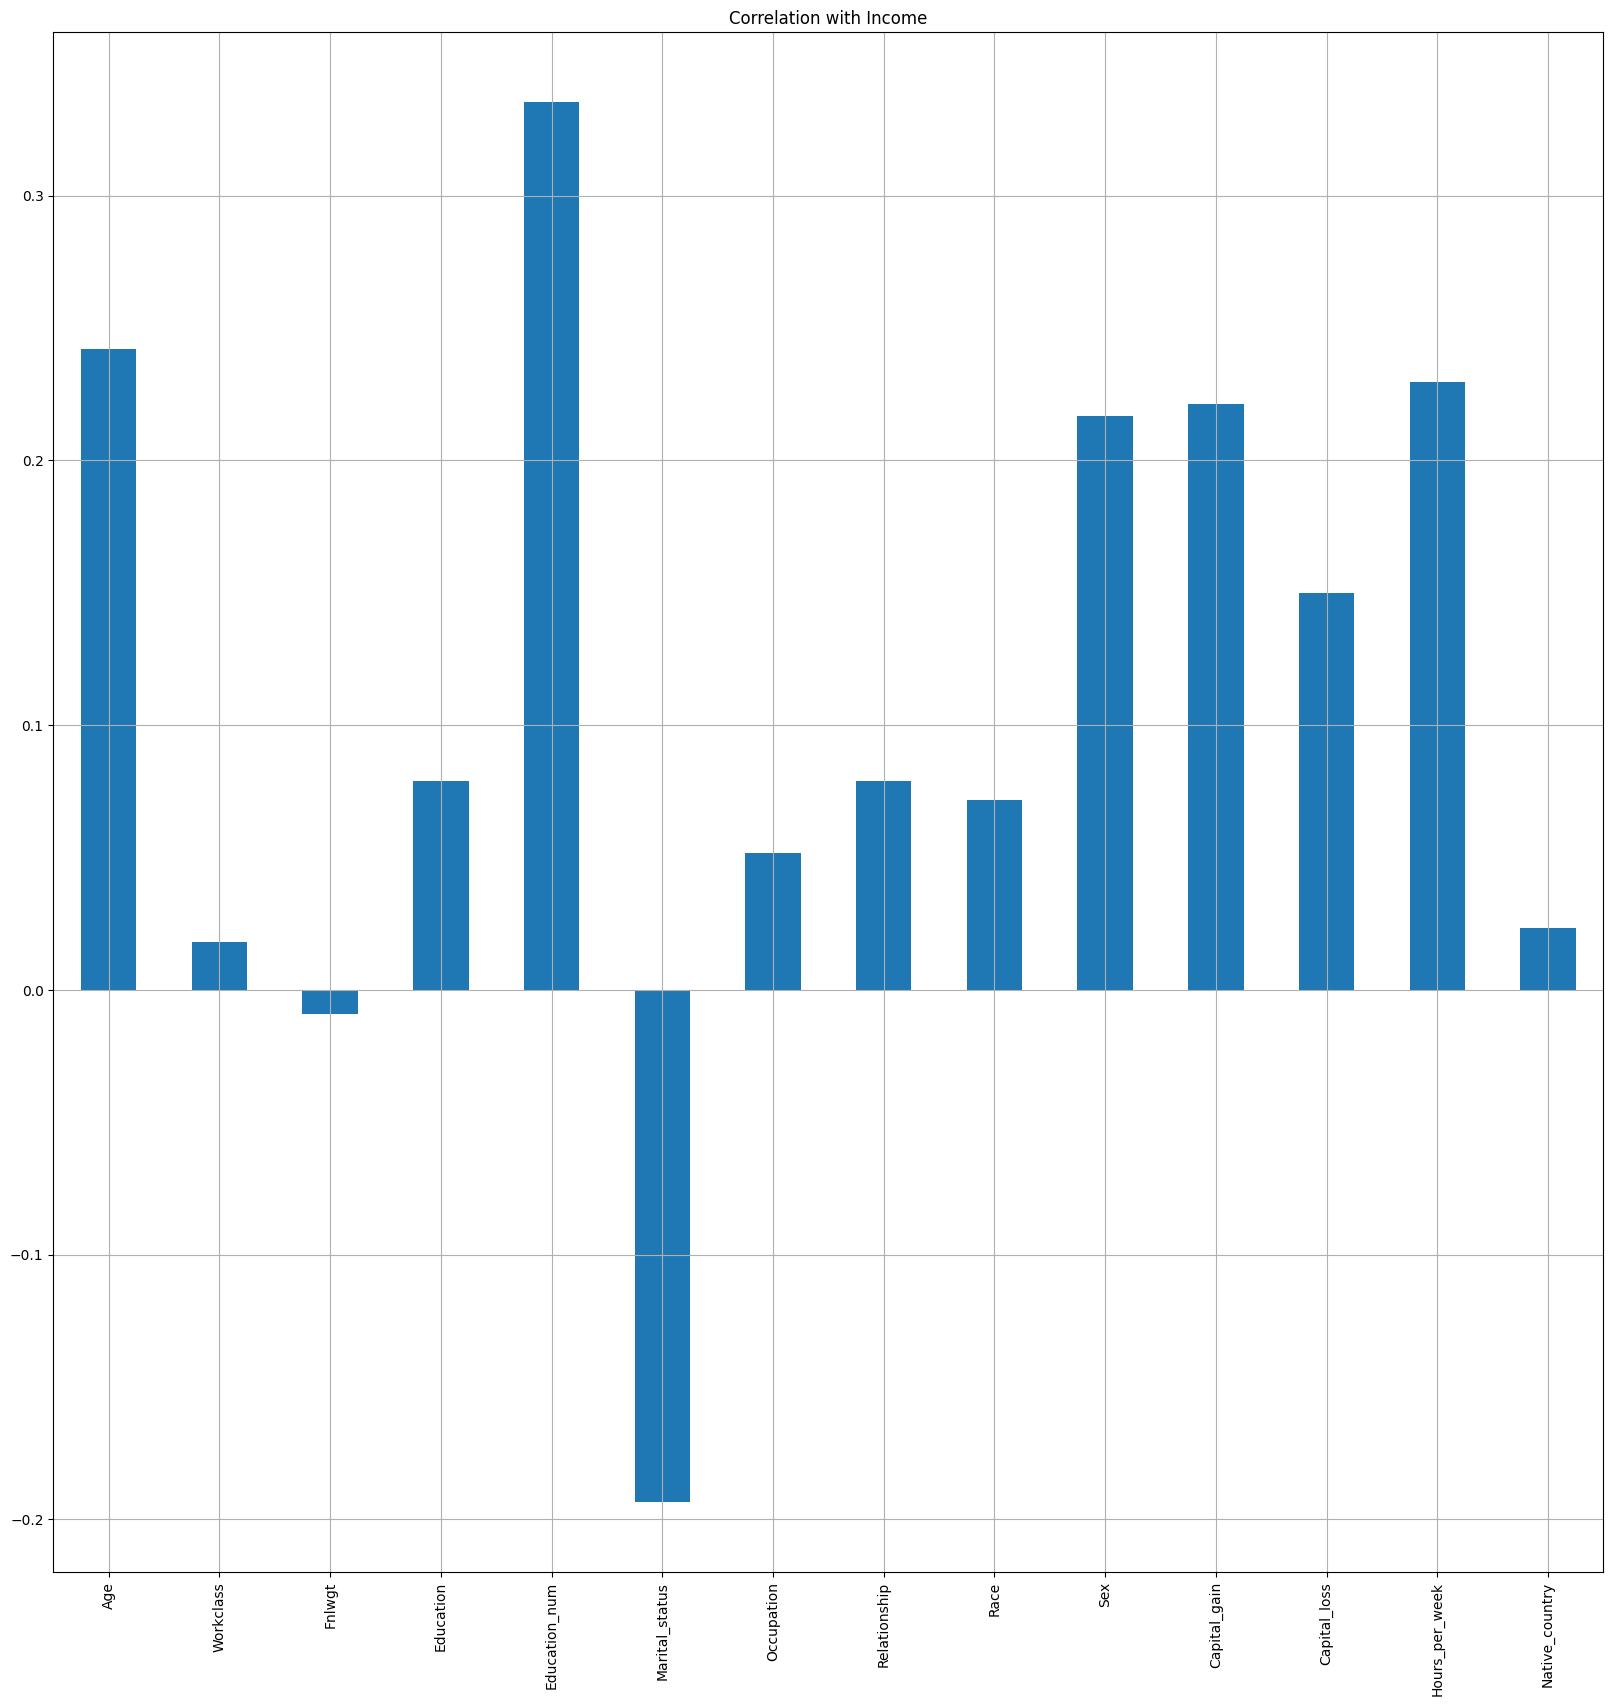

In [269]:
dataset.drop('Income',axis=1).corrwith(dataset['Income']).plot(kind='bar',grid=True,figsize=(20,20),
                                                          title='Correlation with Income')

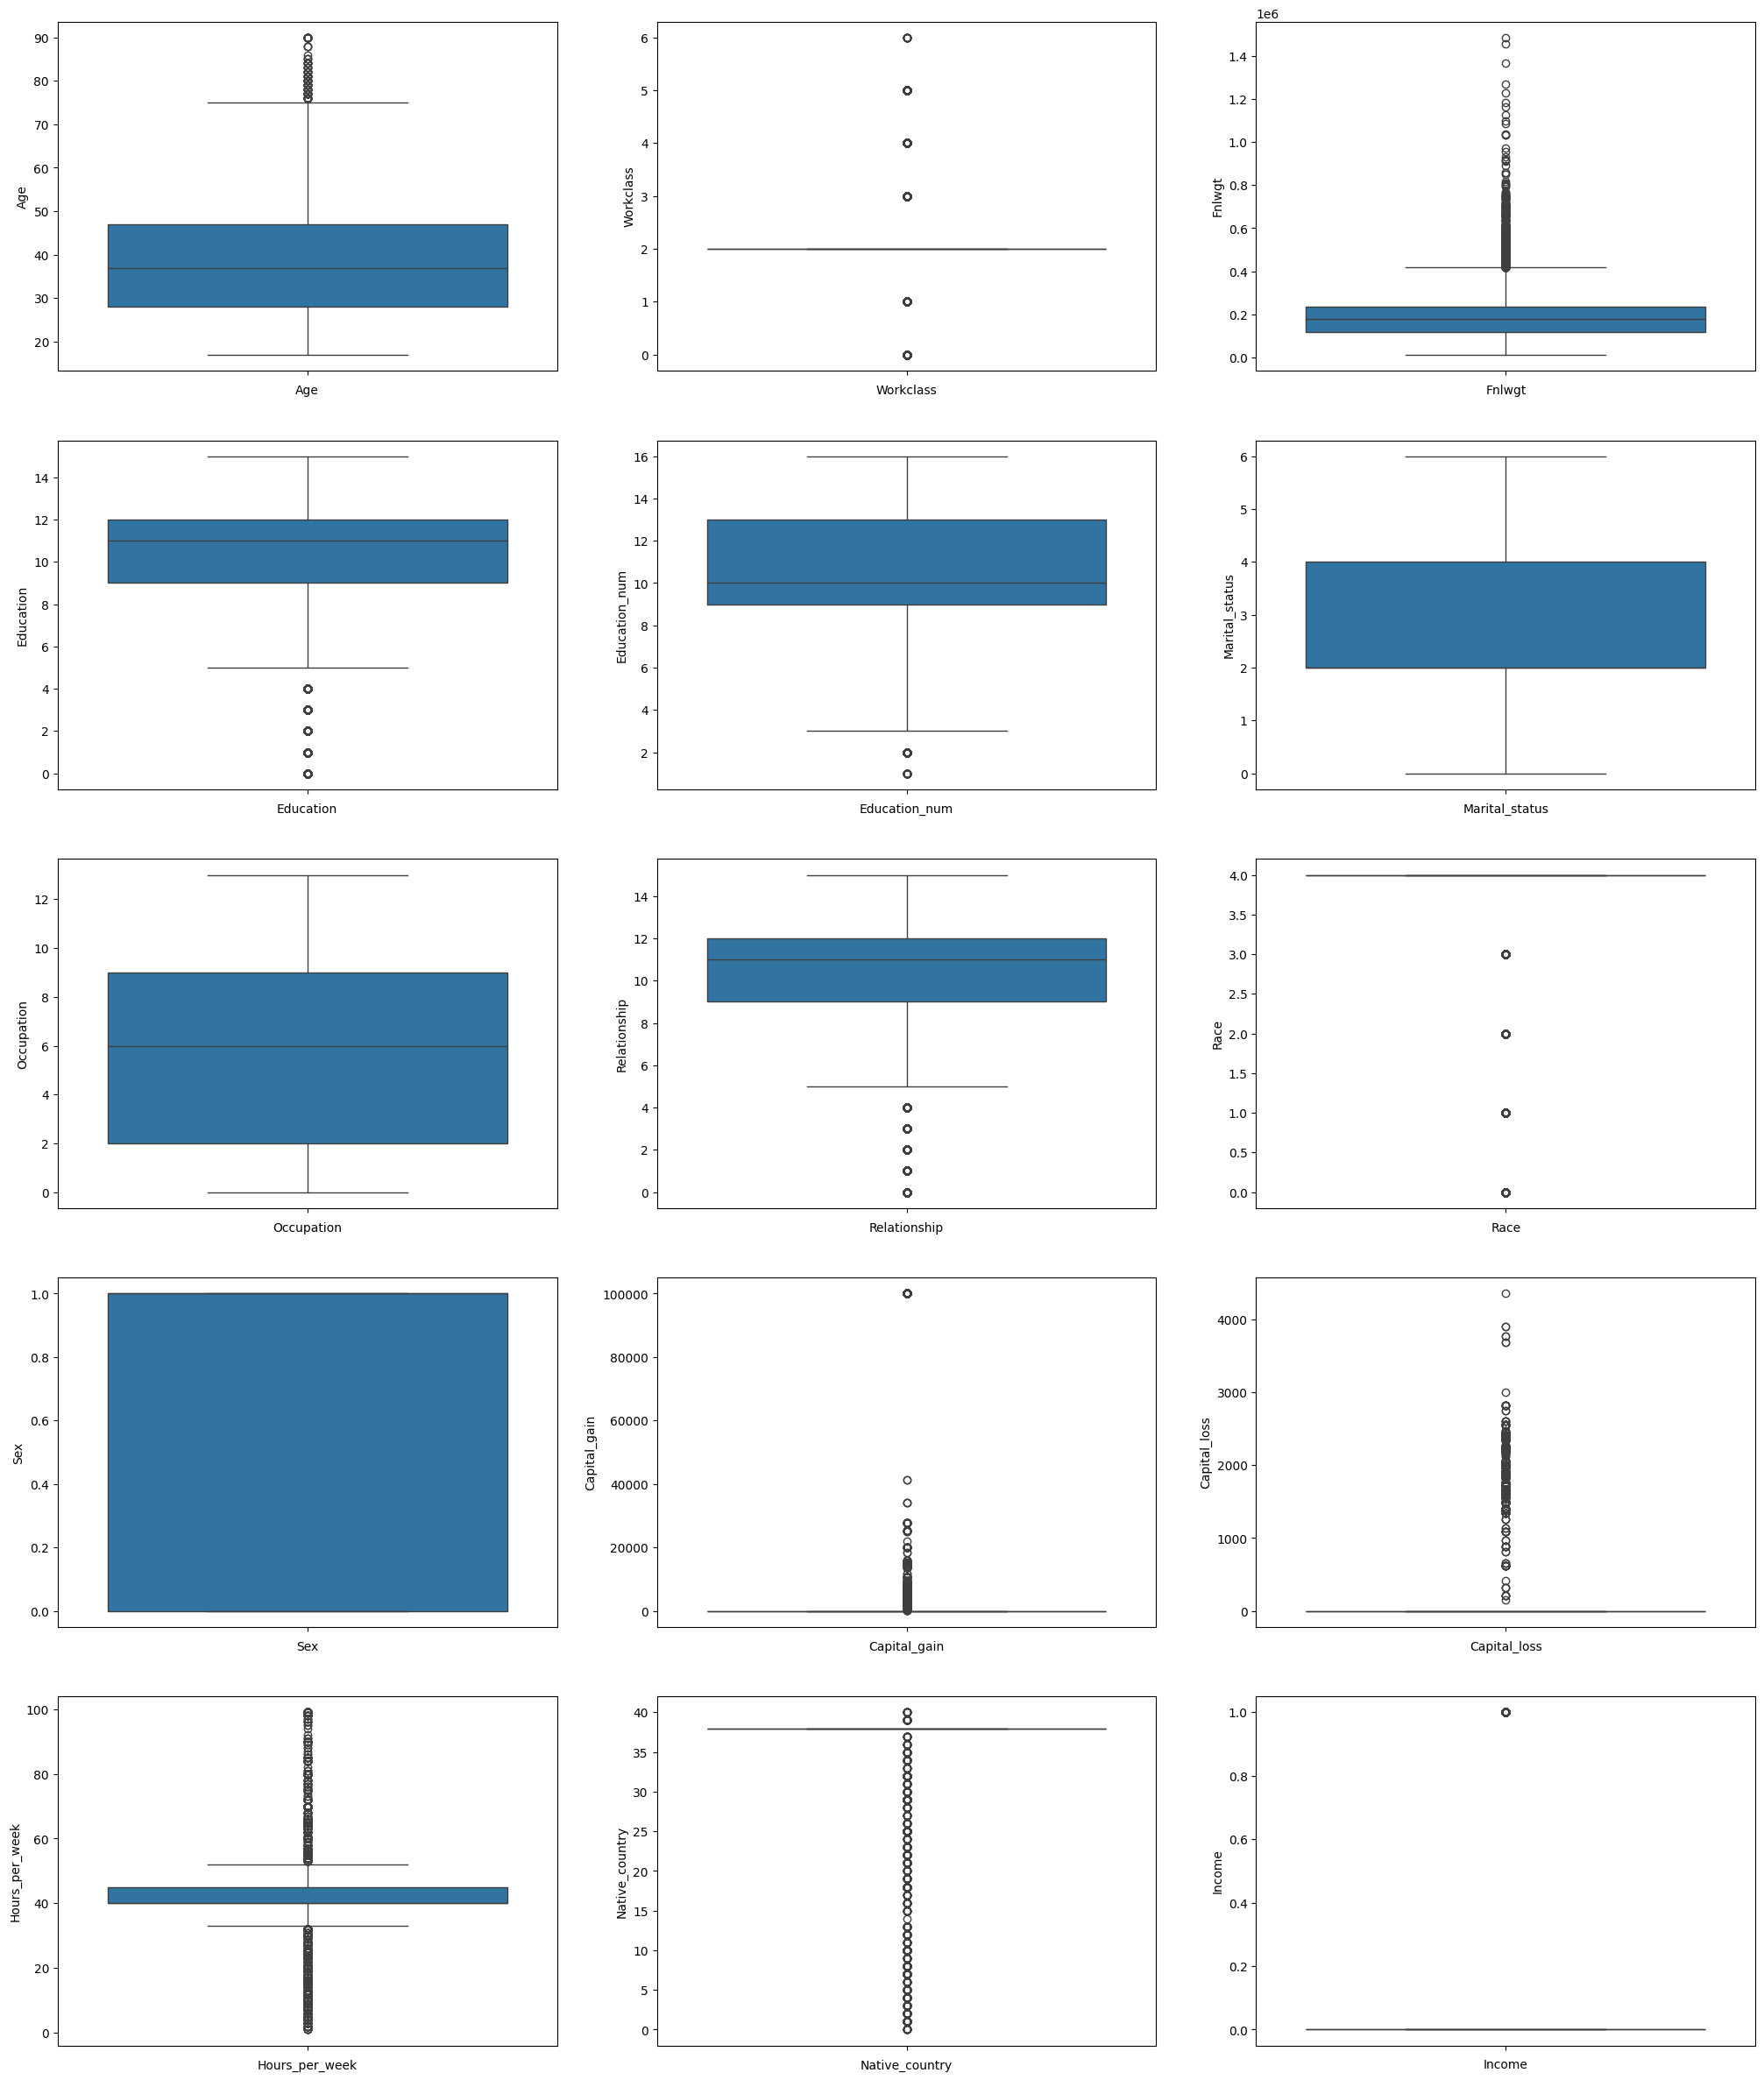

In [270]:
plt.figure(figsize=(25,30))
graph=1
for  column in dataset:
    if graph <=15:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(data=dataset[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()
        

In [271]:
## we can remove the outliers only from continous data 
## so remove the caytegorical data



## Fnlwgt and Age are columns which are having outlier others are having categorical data

### HeatMap

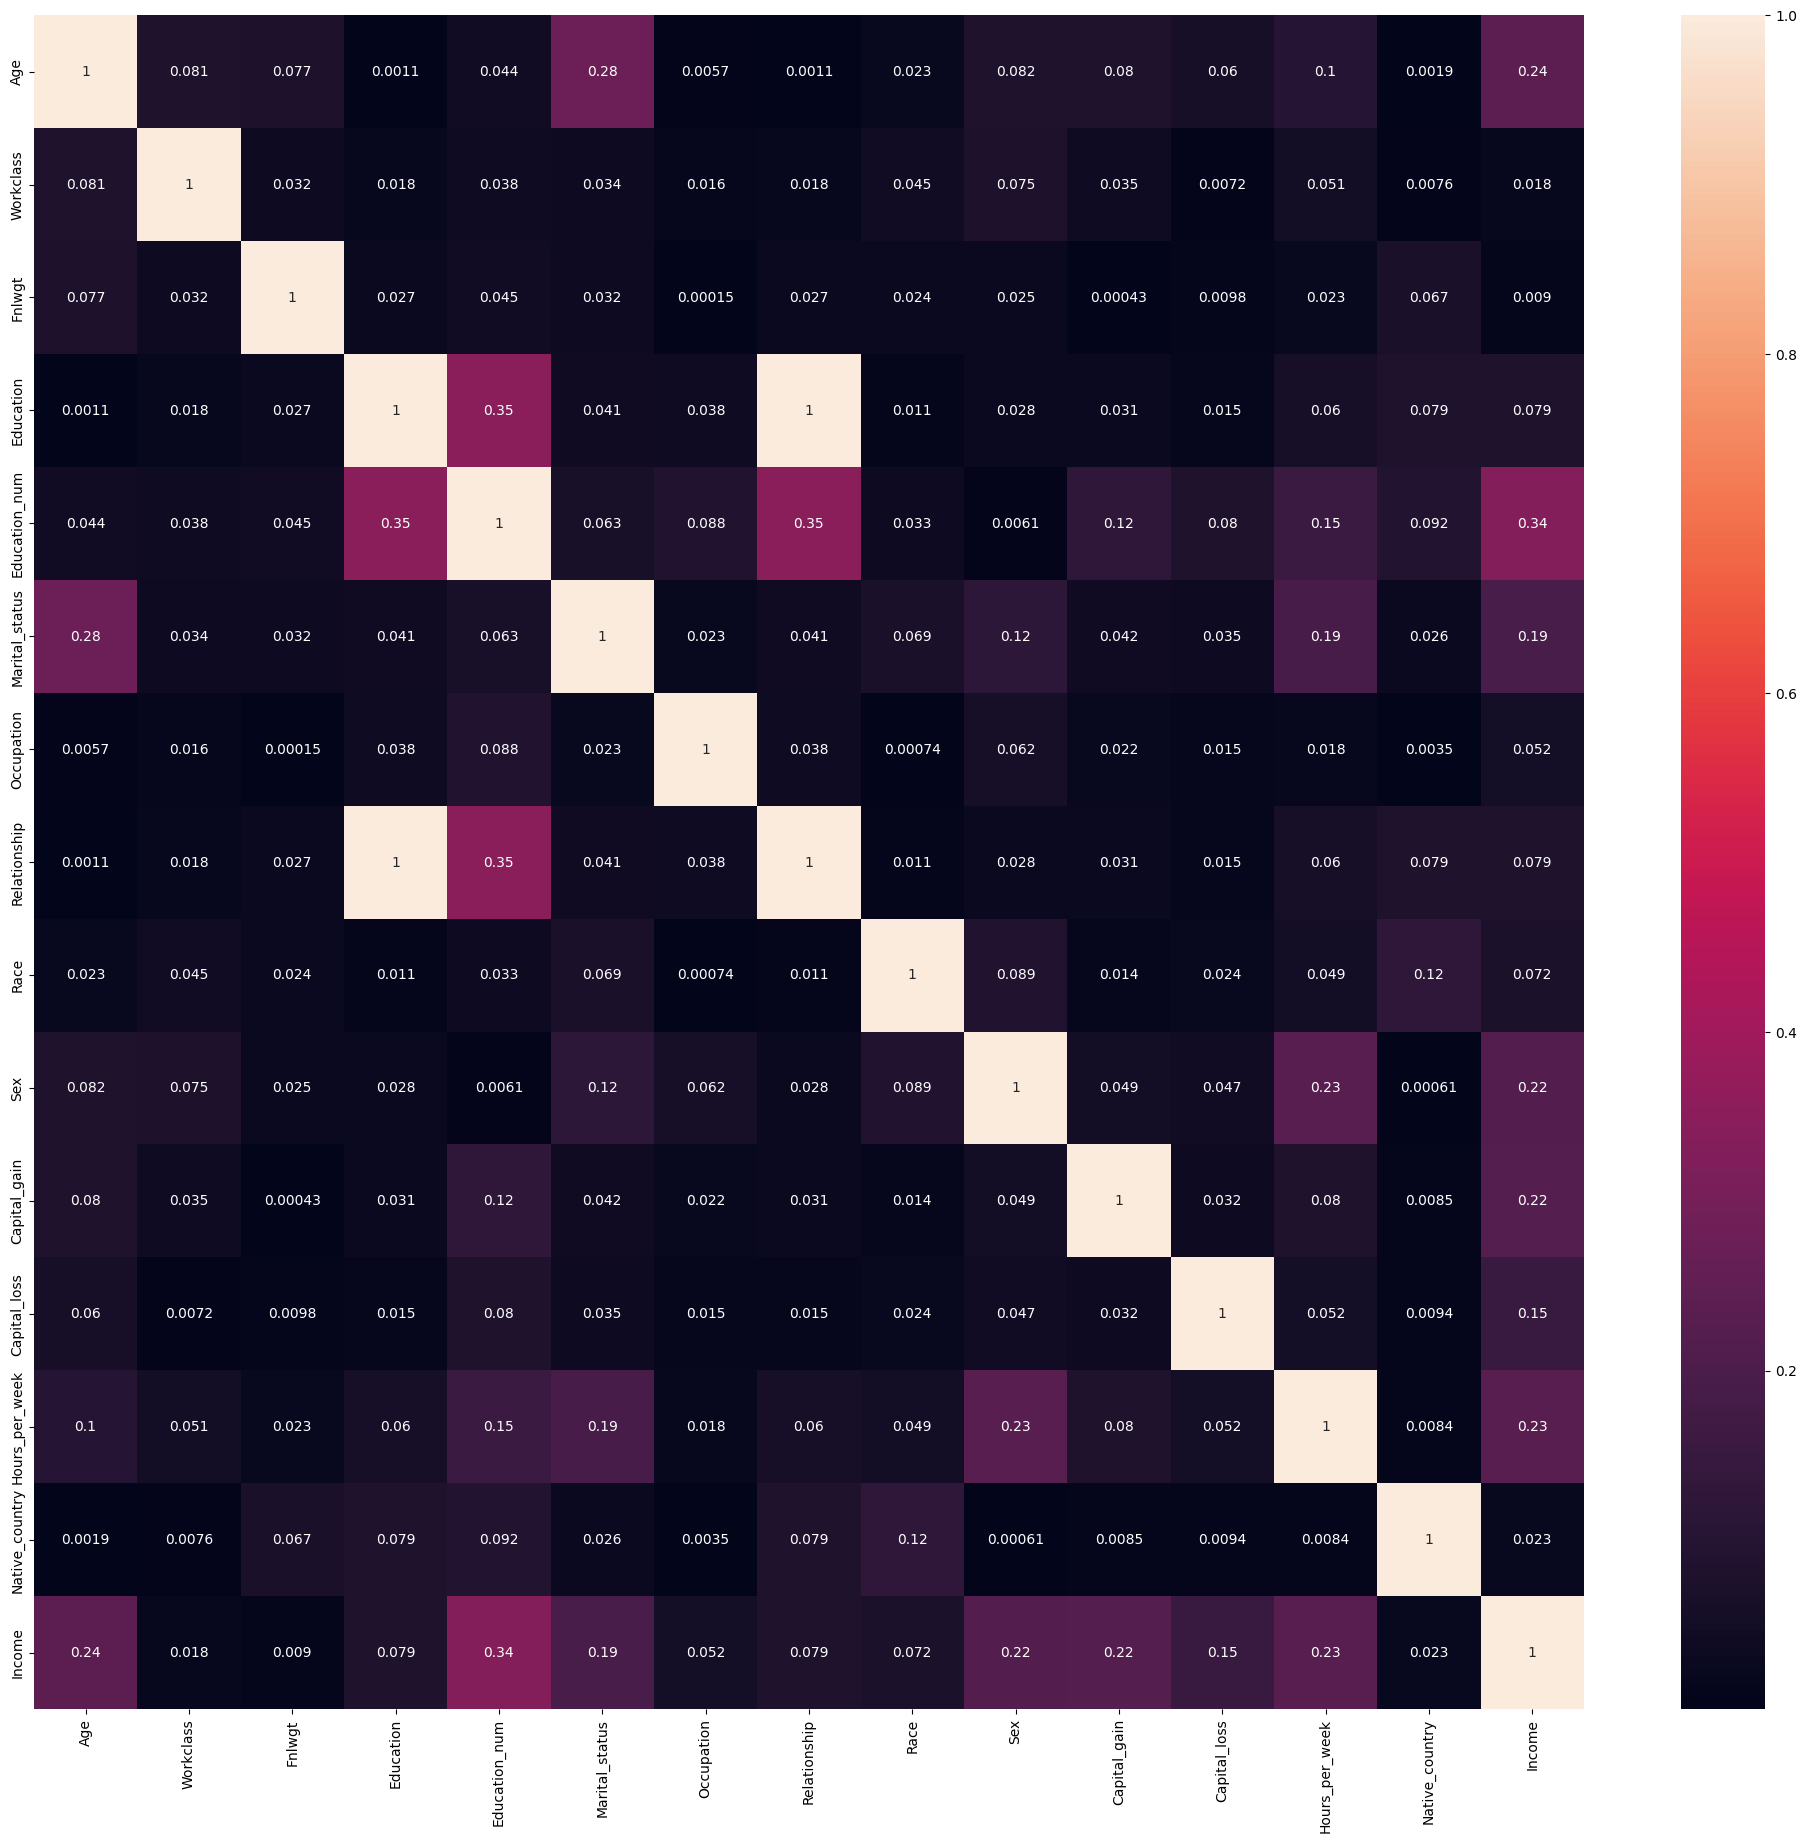

In [272]:
plt.figure(figsize=(25,22))
sns.heatmap(abs(dataset.corr()),annot=True)
plt.show()

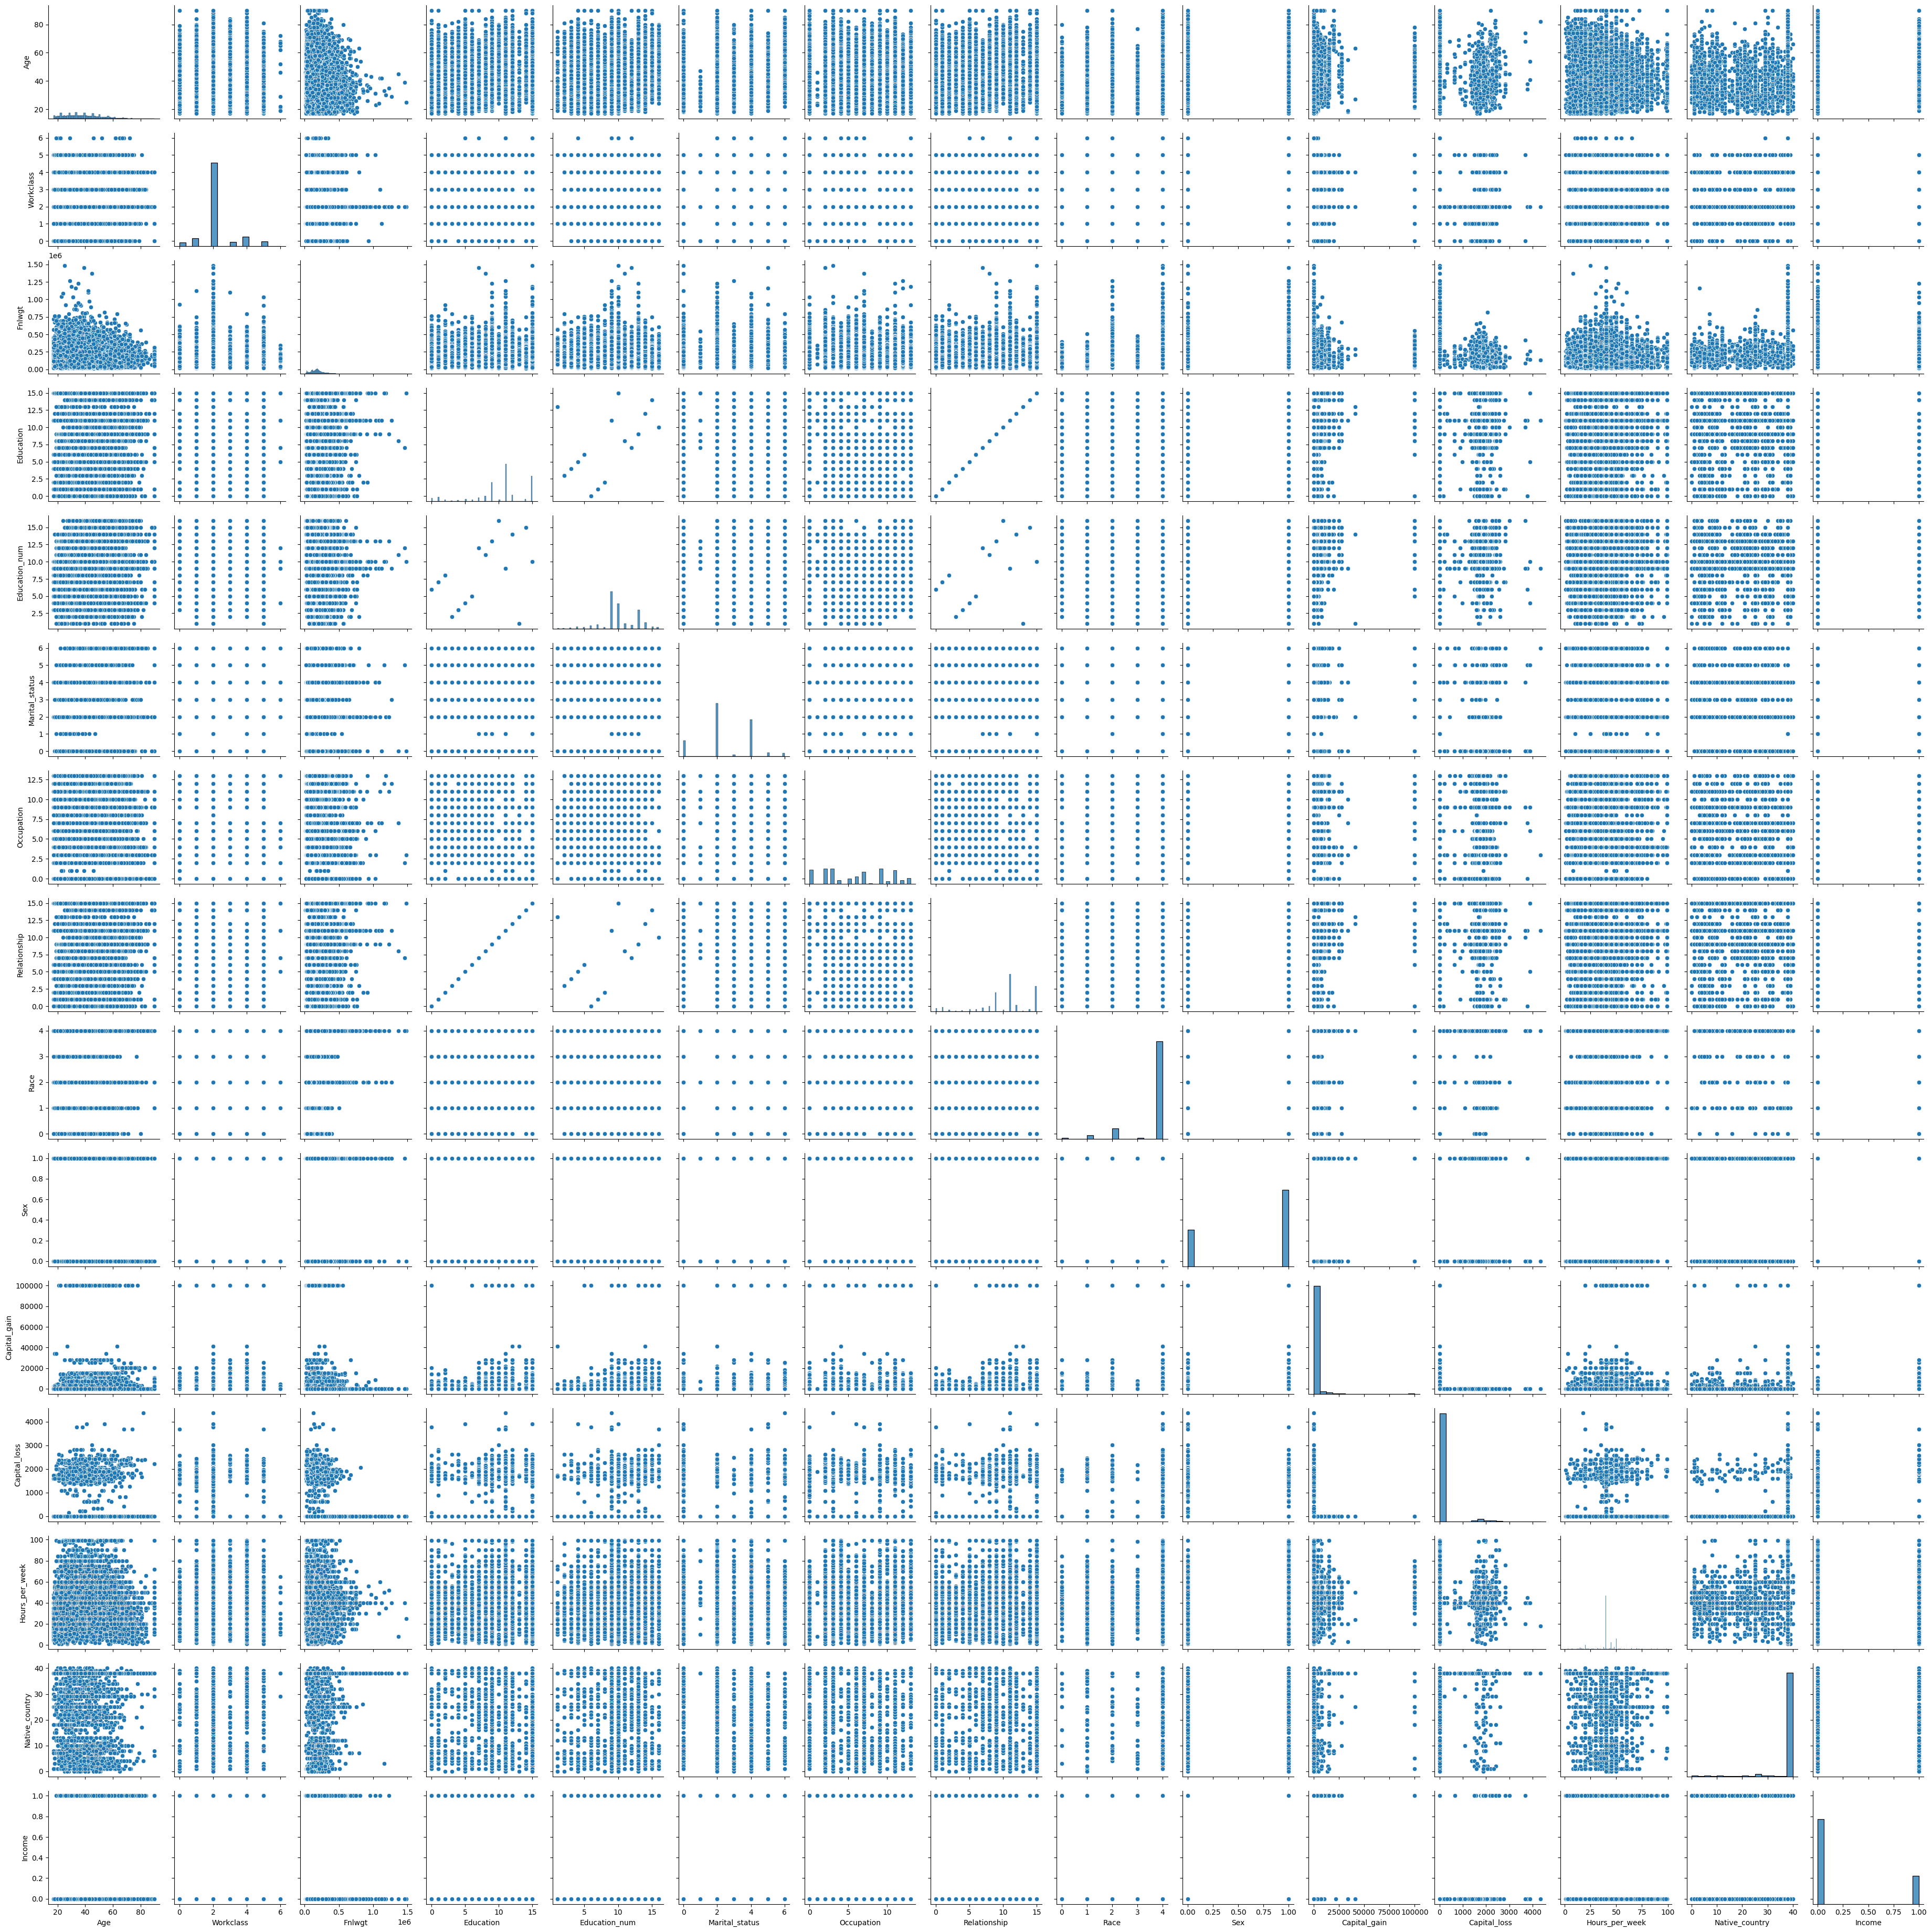

In [273]:

sns.pairplot(dataset)


### Data preprocessing

#### Outlier removed -IQR
#### data normalization -power transformer (skewness)
#### vif value for multicollinearity

In [274]:
q1=dataset.quantile(0.25)
q3= dataset.quantile(0.75)
IQR = q3 - q1
IQR

Age                   19.0
Workclass              0.0
Fnlwgt            120002.0
Education              3.0
Education_num          4.0
Marital_status         2.0
Occupation             7.0
Relationship           3.0
Race                   0.0
Sex                    1.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week         5.0
Native_country         0.0
Income                 0.0
dtype: float64

In [275]:
## upperbound = q3+1.5 X IQR
## lowerbound = q1 - 1.5 X IQR


In [276]:
itv_high= (q3.Fnlwgt +1.5*IQR.Fnlwgt)
print(itv_high)
index= np.where(dataset["Fnlwgt"]>itv_high)
dataset=dataset.drop(dataset.index[index])
print(dataset.shape)
dataset.reset_index()

417633.0
(29258, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,4,83311,9,13,2,3,9,4,1,0,0,13,38,0
1,1,38,2,215646,11,9,0,5,11,4,1,0,0,40,38,0
2,2,53,2,234721,1,7,2,5,1,2,1,0,0,40,38,0
3,3,28,2,338409,9,13,2,9,9,2,0,0,0,40,4,0
4,4,37,2,284582,12,14,2,3,12,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29253,32555,27,2,257302,7,12,2,12,7,4,0,0,0,38,38,0
29254,32556,40,2,154374,11,9,2,6,11,4,1,0,0,40,38,1
29255,32557,58,2,151910,11,9,6,0,11,4,0,0,0,40,38,0
29256,32558,22,2,201490,11,9,4,0,11,4,1,0,0,20,38,0


In [277]:
itv_high= (q3.Age +1.5*IQR.Age)
print(itv_high)
index= np.where(dataset["Age"]>itv_high)
dataset=dataset.drop(dataset.index[index])
print(dataset.shape)
dataset.reset_index()

75.5
(29090, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,4,83311,9,13,2,3,9,4,1,0,0,13,38,0
1,1,38,2,215646,11,9,0,5,11,4,1,0,0,40,38,0
2,2,53,2,234721,1,7,2,5,1,2,1,0,0,40,38,0
3,3,28,2,338409,9,13,2,9,9,2,0,0,0,40,4,0
4,4,37,2,284582,12,14,2,3,12,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085,32555,27,2,257302,7,12,2,12,7,4,0,0,0,38,38,0
29086,32556,40,2,154374,11,9,2,6,11,4,1,0,0,40,38,1
29087,32557,58,2,151910,11,9,6,0,11,4,0,0,0,40,38,0
29088,32558,22,2,201490,11,9,4,0,11,4,1,0,0,20,38,0


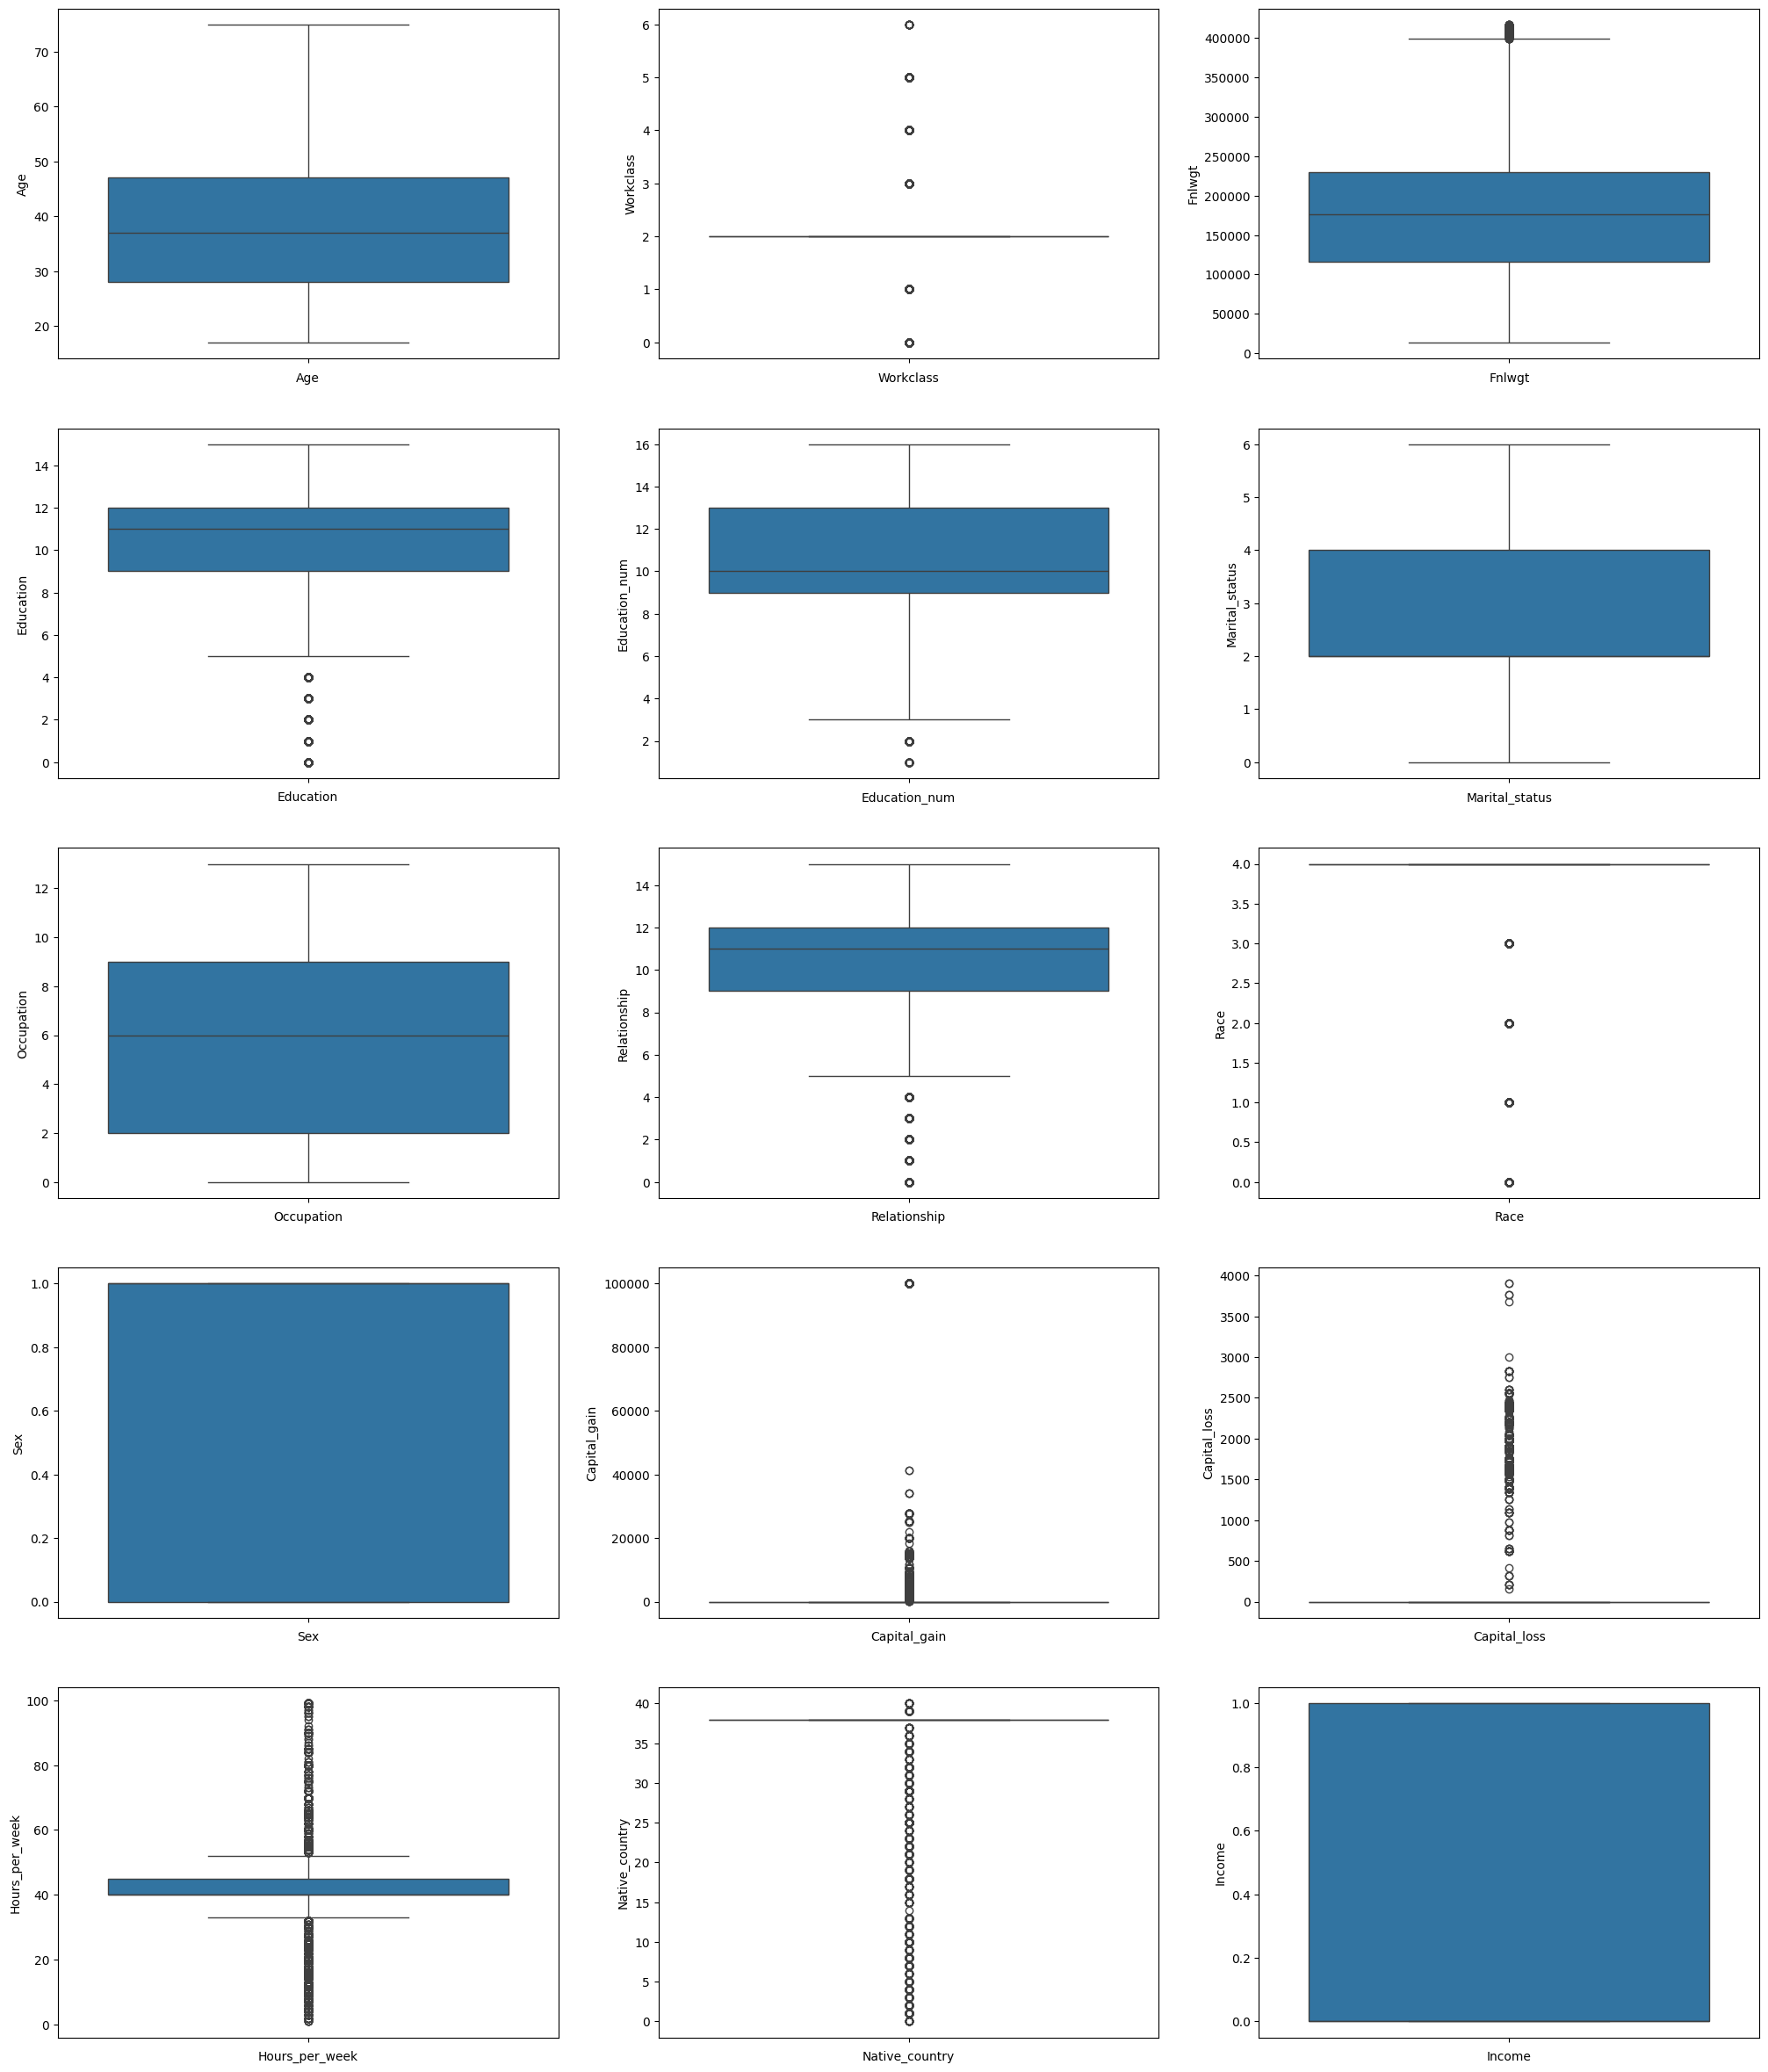

In [278]:
plt.figure(figsize=(25,30))
graph=1
for  column in dataset:
    if graph <=15:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(data=dataset[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()
        

In [279]:
features = ['Age' , 'Fnlwgt']
from sklearn.preprocessing import PowerTransformer
pt=  PowerTransformer(method='box-cox')
dataset[features]=pt.fit_transform(dataset[features].values)
dataset.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.941508,4,-1.119904,9,13,2,3,9,4,1,0,0,13,38,0
1,0.095416,2,0.479453,11,9,0,5,11,4,1,0,0,40,38,0
2,1.130175,2,0.674301,1,7,2,5,1,2,1,0,0,40,38,0
3,-0.768668,2,1.646189,9,13,2,9,9,2,0,0,0,40,4,0
4,0.016805,2,1.157944,12,14,2,3,12,4,0,0,0,40,38,0


##### Data standardization and vif values for multicollinearity

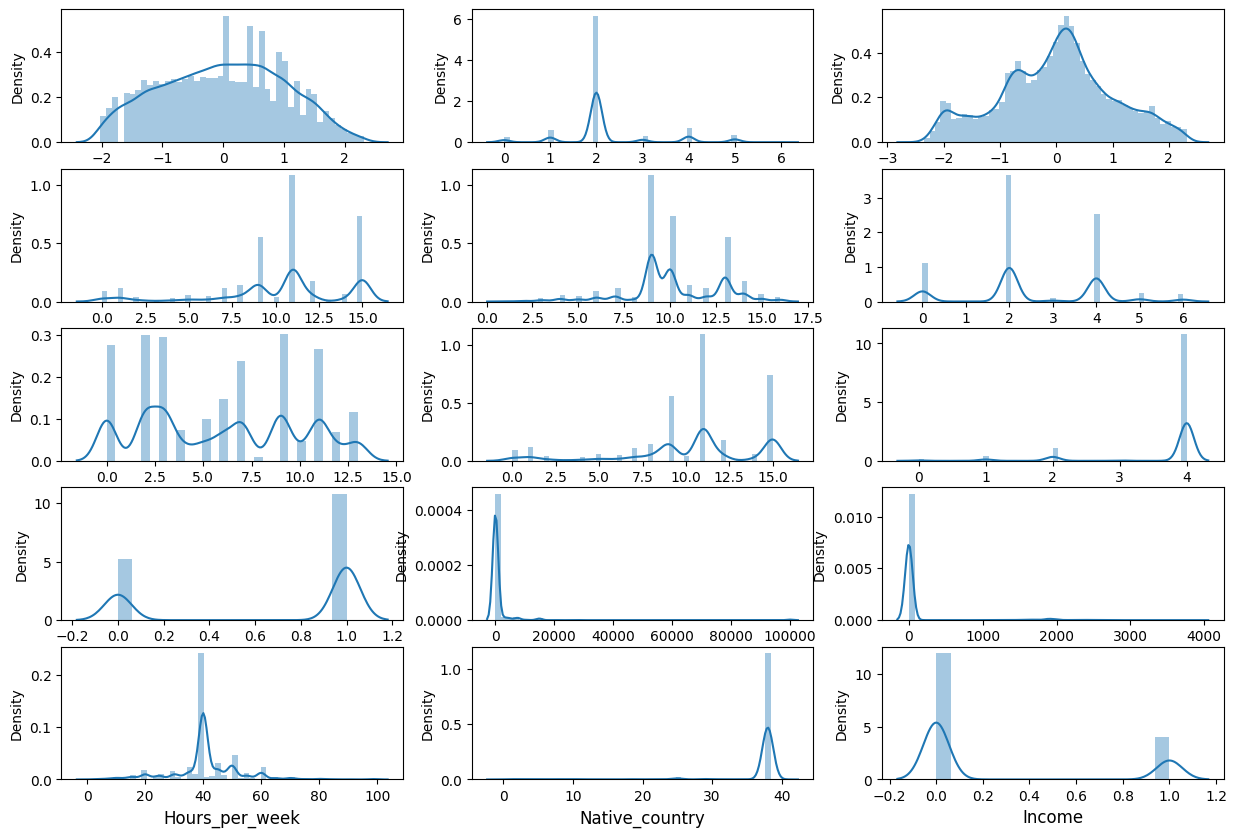

In [280]:
plt.figure(figsize=(15,10))
plotnumber = 1
for column in dataset:
    ax=plt.subplot(5,3,plotnumber)
    sns.distplot(dataset[column])
    plt.xlabel(column,fontsize = 12)
    plotnumber+=1
plt.show()

#### data standardiation and vif value check

In [281]:
x = dataset.iloc[:,:-1]
y = dataset['Income']

In [282]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(x)
X=pd.DataFrame(X_scaled , columns=x.columns)

In [283]:
!pip install statsmodels



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [284]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]
vif['Feature']=X.columns
vif

,vif,Feature
0,1.155821,Age
1,1.015064,Workclass
2,1.010425,Fnlwgt
3,inf,Education
4,1.196121,Education_num
5,1.157306,Marital_status
6,1.018249,Occupation
7,inf,Relationship
8,1.032462,Race
9,1.086496,Sex


In [285]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.941508,4,-1.119904,9,13,2,3,9,4,1,0,0,13,38
1,0.095416,2,0.479453,11,9,0,5,11,4,1,0,0,40,38
2,1.130175,2,0.674301,1,7,2,5,1,2,1,0,0,40,38
3,-0.768668,2,1.646189,9,13,2,9,9,2,0,0,0,40,4
4,0.016805,2,1.157944,12,14,2,3,12,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.866460,2,0.897587,7,12,2,12,7,4,0,0,0,38,38
32556,0.248373,2,-0.194774,11,9,2,6,11,4,1,0,0,40,38
32557,1.428564,2,-0.223772,11,9,6,0,11,4,0,0,0,40,38
32558,-1.397908,2,0.330728,11,9,4,0,11,4,1,0,0,20,38


### Model Training

In [286]:
!pip install scikit-plot




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [287]:
!pip install scipy==1.11.4



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [289]:
for i in range(500,700):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred_train = LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)**round(accuracy_score(y_test,pred_test)*100,1):
        print("at random state",accuracy_score(y_train,pred_train)*100)
        print("at random state",i)
        print("training accuracy score is ",accuracy_score(y_train,pred_train)*100)
        print("testing accuracy score is ",accuracy_score(y_test,pred_test)*100)
        
    
    

at random state 78.91887246476452
at random state 500
training accuracy score is  78.91887246476452
testing accuracy score is  78.46338948092128
at random state 78.72980405637676
at random state 501
training accuracy score is  78.72980405637676
testing accuracy score is  78.73839807493984
at random state 78.94465452045377
at random state 502
training accuracy score is  78.94465452045377
testing accuracy score is  78.25713303540735
at random state 79.30990030938467
at random state 503
training accuracy score is  79.30990030938467
testing accuracy score is  77.12272258508078
at random state 78.63526985218287
at random state 504
training accuracy score is  78.63526985218287
testing accuracy score is  78.9274664833276
at random state 78.51495359229976
at random state 505
training accuracy score is  78.51495359229976
testing accuracy score is  79.4431075971124
at random state 78.7126160192506
at random state 506
training accuracy score is  78.7126160192506
testing accuracy score is  78.5493

#### Random_state = 543

### imbalancing check

In [290]:
!pip install imbalanced-learn




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [291]:
from sklearn.model_selection import train_test_split
x_train,x_text,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=543)

### Random _State = 562

In [292]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=562)


In [293]:
print("Training outcome -\n" , y_train.value_counts())

Training outcome -
 Income
0    17469
1     5803
Name: count, dtype: int64


In [294]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [295]:
print('training outcomes ./n', y_train.value_counts())

training outcomes ./n Income
0    17469
1     5803
Name: count, dtype: int64


In [296]:
5803/17469

0.3321884481080772

In [297]:
Counter(y_train)

Counter({0: 17469, 1: 5803})

In [298]:
ove_smp =SMOTE(sampling_strategy=0.6, random_state=42)
x_train_ns, y_train_ns= ove_smp.fit_resample(x_train,y_train)
print("the no. of classes before fit", format(Counter(y_train)))
print("the no. of classes after fit", format(Counter(y_train_ns)))



the no. of classes before fit Counter({0: 17469, 1: 5803})
the no. of classes after fit Counter({0: 17469, 1: 10481})


### logistic regression

In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr=LogisticRegression()
lr.fit(x_train_ns , y_train_ns)
pred = lr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print( 'confussion matrix \n',confusion_matrix(y_test,pred))

76.14300446888966
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4344
           1       0.53      0.55      0.54      1474

    accuracy                           0.76      5818
   macro avg       0.69      0.69      0.69      5818
weighted avg       0.77      0.76      0.76      5818

confussion matrix 
 [[3614  730]
 [ 658  816]]


## Decision Tree

In [300]:
from sklearn .tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_ns , y_train_ns)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test , pred_dt)*100)
print(classification_report(y_test,pred_dt))
print('confusion matrix \n',confusion_matrix(y_test,pred_dt))


80.68064627019595
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4344
           1       0.61      0.66      0.63      1474

    accuracy                           0.81      5818
   macro avg       0.75      0.76      0.75      5818
weighted avg       0.81      0.81      0.81      5818

confusion matrix 
 [[3717  627]
 [ 497  977]]


### Ensemble Techniques

#### Random Forest

In [301]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_rf = dt.predict(x_test)
print(accuracy_score(y_test,pred_rf))
print(classification_report(y_test,pred_rf))
print('confusion martrix \n',confusion_matrix(y_test,pred_rf))

0.8068064627019594
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4344
           1       0.61      0.66      0.63      1474

    accuracy                           0.81      5818
   macro avg       0.75      0.76      0.75      5818
weighted avg       0.81      0.81      0.81      5818

confusion martrix 
 [[3717  627]
 [ 497  977]]


### Gradient Boosting

In [302]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_gb = gb.predict(x_test)
print(accuracy_score(y_test, pred_gb))
print(classification_report(y_test , pred_gb))
print('confusion matrix \n' , confusion_matrix(y_test,pred_gb))
                            

0.851495359229976
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4344
           1       0.69      0.74      0.72      1474

    accuracy                           0.85      5818
   macro avg       0.80      0.81      0.81      5818
weighted avg       0.86      0.85      0.85      5818

confusion matrix 
 [[3863  481]
 [ 383 1091]]


### Xtreme boosting

In [303]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [304]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(x_train_ns , y_train_ns)
pred_xgbt=xgbt.predict(x_test)
print(accuracy_score(y_test,pred_xgbt)*100)
print(classification_report(y_test, pred_xgbt))
print('confusion matrix\n' , confusion_matrix(y_test,pred_xgbt))

86.16363011344104
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4344
           1       0.71      0.76      0.73      1474

    accuracy                           0.86      5818
   macro avg       0.81      0.83      0.82      5818
weighted avg       0.86      0.86      0.86      5818

confusion matrix
 [[3898  446]
 [ 359 1115]]


### SVM

In [305]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_ns,y_train_ns)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test , pred_svc)*100)
print(classification_report(y_test,pred_svc))
print('confusion matrix \n', confusion_matrix(y_test , pred_svc))

    


79.16809900309386
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      4344
           1       0.75      0.27      0.39      1474

    accuracy                           0.79      5818
   macro avg       0.77      0.62      0.63      5818
weighted avg       0.78      0.79      0.75      5818

confusion matrix 
 [[4213  131]
 [1081  393]]


In [306]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR , x,y , cv=5)
print('cross validation scorw of logistic regression modek is', scr.mean()*100)

cross validation scorw of logistic regression modek is 78.81746304572019


In [307]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y ,cv=5)
print('cross validation scorw of decision tree model is', scr.mean()*100)

cross validation scorw of decision tree model is 80.49501546923341


In [308]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x, y ,cv=5)
print('cross validation scorw of random forest model is', scr.mean()*100)

cross validation scorw of random forest model is 85.07390855964249


In [309]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(gb, x, y, cv=5)
print('cross validation scorw of gradient boosting model is', scr.mean()*100)

cross validation scorw of gradient boosting model is 86.08800275008595


In [310]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(xgbt, x, y, cv=5)
print('cross validation scorw of xtreme gradient boosting  model is', scr.mean()*100)

cross validation scorw of xtreme gradient boosting  model is 86.61051907872121


## ROC -AUC

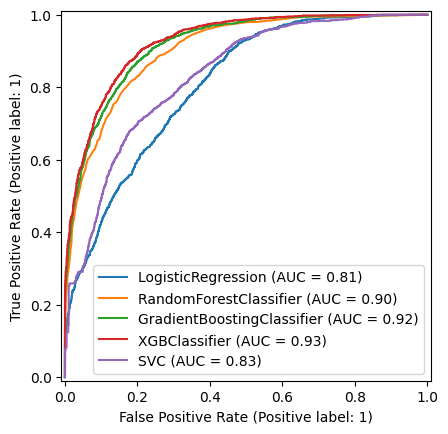

In [312]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
disp = RocCurveDisplay.from_estimator(LR, x_test, y_test)
RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gb, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(xgbt, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svc, x_test, y_test, ax=disp.ax_)
plt.show()
